# Principal Component Analysis

   Principal component analysis (PCA) has been called one of the most valuable results from applied linear algebra.It is used to reduce a large set of variables to a small set that still contains most of the information in the large set.

   It is a mathematical procedure that transforms a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called principal components.The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

### So how to perform pca on given dataset?
- Get some data
- Substract the mean
- Calculate the covariance matrix for the data
- Calculate the eigen vectors and eigen values of covariance matrix
- Choosing components and forming a feature vector
- Deriving the new data set

Consider our data set consists of n variables and m samples.This can be as a mxn matrix,

\begin{equation}
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1m} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2m} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & x_{n3} & \dots  & x_{nm}
\end{bmatrix}=
\begin{bmatrix}
    X1 \\
    X2 \\
    \vdots \\
    Xn
\end{bmatrix}    
\end{equation}



  For PCA to work properly you have to subtract the mean from each of the data dimensions.The mean subtracted is the ave rage across each dimension.So, all the X1 values have  $\overline{X1}$(the mean of the x values of all the data points)substracted ,all the X2 values have $\overline{X2}$ substracted from them,similarly for all .


**Covariance** is a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. We use the following formula to compute covariance.

\begin{equation}
Cov(X, Y) = \sum^{m}_{i=1} \dfrac{ ( X_i - \overline{X} ) ( Y_i - \overline{Y} )} { m} = \sum^{m}_{i=1} \dfrac{ X_i \times Y_i }{ m  }
\end{equation}      

**Covariance matrix** :
The variances appear along the diagonal and covariances appear in the off-diagonal elements.


\begin{equation}
v=
\begin{bmatrix}
    Cov(X1,X2) & Cov(X1,X2) & Cov(X1,X3) & \dots  & Cov(X1,Xn) \\
    Cov(X2,X1) & Cov(X2,X2) & Cov(X2,X3) & \dots  & Cov(X2,Xn) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    Cov(Xn,X1) & Cov(Xn,X2) & Cov(Xn,X3) & \dots  & Cov(Xn,Xn)
\end{bmatrix}
\end{equation}


**Eigen values and Eigen vectors**:
  Eigen vector of a matrix A is a vector represented by a matrix X such that when X is multiplied with matrix A, then the direction of the resultant matrix remains same as vector X.

Mathematically, above statement can be represented as:
\begin{equation}
AX = 
λX 
\end{equation

- Method to find eigen vectors and eigen values of any square matrix A.We know that,

                    AX = λX

                => AX – λX = 0

                 => (A – λI) X = 0 ....(1)

 Above condition will be true only if (A – λI) is singular. That means,

                       |A – λI| = 0 ....(2)

 (2) is known as characteristic equation of the matrix.

 The roots of the characteristic equation are the eigen values of the matrix A.

 Now, to find the eigen vectors, we simply put each eigen value into (1) and solve it by Gaussian elimination, that is, convert the augmented matrix (A – λI) = 0 to row echelon form and solve the linear system of equations thus obtained.
 
**Components and FeatureVector**:
Here is where the notion of data compression and reduced dimensionality comes in.The eigenvectors have unit norm but have different eigenvalues.
In fact, it turns out that the eigenvectors having higher eigenvalues are the principal directions of our data set.The highest eigenvalue corresponds to the first principal component and the second highest corresponds to second principal component and so on.

If we want to reduce our dataset to K dimensions(initially n(>k) dimensions) we select the first K eigenvectors,which are arranged in decreasing order with respect to corresponding eigen values,which is our feature vector.
\begin{equation}
    FeatureVector = (eig_1,eig_2,....,eig_k)
\end{equation}
 
**New Dataset**:
This is the final step of pca.So after obtaining featurevector, we project original data along the principal components.
This can be done by just multipliying our original matrix with feature vector.

\begin{equation}
FinalData = OriginalData(after \ substracting \ mean)\times FeatureVector
\end{equation}

















 


### Why do we get principal components from eigenvectors of covariance matrix

- we need to find the direction of maximum variance for obtaining principal components.

Let suppose we have 3 data points in space $x_1$,$x_2$,$x_3$.Now we want to find a vector e(unit norm) ,such that: it is the direction of maximum variance.So for calculating variance we project the datapoints onto the vector e(projection implies dot product of $x_i$ with e).

The variance of data points is

\begin{equation}
variance \ of \ projections = \dfrac{1}{n}\sum^{n}_{i=1}\Bigg(\sum^{d}_{j=1}x_{ij} \ e_{j}-\mu \Bigg)^2 = \dfrac{1}{n}\sum^{n}_{i=1}\Bigg(\sum^{d}_{j=1}x_{ij} \ e_{j}\Bigg)^2 \ (when \ mean \ is \ zero)
\end{equation}

Now we have to maximize variance of projections.We add lagrange multiplier(for optimization, to the above equation).As we are constrained to the fact that e is of unit norm $\big(\sum^d_{j=1}e_j^2=1 \big)$.


\begin{equation}
V  = \dfrac{1}{n}\sum^{n}_{i=1}\Bigg(\sum^{d}_{j=1}x_{ij} \ e_{j}\Bigg)^2 \ - \lambda \Bigg(\Bigg(\sum^d_{j=1}e_j^2\Bigg)-1 \Bigg)
\end{equation}

Now differentiate V wrt components of e and equate then to zero.

\begin{equation}
\frac{\partial V}{\partial e_k}= \dfrac{2}{n} \sum^{n}_{i=1}\Bigg(\sum^{d}_{j=1}x_{ij} \ e_{j}\Bigg)x_{ik} - 2\lambda e_{k} = 0
\end{equation}
 
 It implies

\begin{equation}
\sum^{d}_{j=1}e_{j}\underbrace{\Bigg( \dfrac{1}{n}\Bigg(\sum^{n}_{i=1} x_{ik} \ x_{ij}\Bigg)\Bigg)}_\text{covariance of 
Xk,Xj} = \lambda e_{k}
\end{equation}

Holds for all k=1,2,3,...d

- It implies that we are taking dot product of matrix with cov(Xi,Xj) as its elements, with column vector e.

It is of the form :

\begin{equation}
Ax=\lambda x
\end{equation}

Where A is the covariance matrix and x is the direction of maximum variance. 

#### So by maximizing the variance, we got the conditon that the eigenvectors of covariance matrix represent the direction of maximum variance.









In [56]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d-

In [70]:
def Reduced_data_set(dataset,final_dimension, plot = False):
    # Centering all the features to zero mean    
    Mean_of_data=dataset.mean(0)
    centered_data=dataset-Mean_of_data
    
    # Calculating the Covariance Matrix
    covariance_matrix=np.cov(centered_data.T)
    
    # Computing the eigenvalues and eigenvectors of the Covariance Matrix 
    eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
    
    # Sorting the eigenvalues from largest to smallest
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    
    # Projecting the dataset on the final_dimension eigenvectors (selected based on higher eigenvalue)
    reduced=np.matmul(centered_data,eigen_vectors[:,:final_dimension],out=None)
    
    # If plotting the eigenvector of the covariance matrix and mean centered data is asked
    if plot:
      plt.title("Mean Centered Data and the EigenVectors of Covariance Matrix (Scaled by EigenValue)")
      plt.plot(centered_data[:,0][:50], centered_data[:,1][:50], 'ro', label = ' Data A')
      plt.plot(centered_data[:,0][50:], centered_data[:,1][50:], 'go', label = ' Data B')
      plt.quiver([0,0], [0,0], *eigen_values*(eigen_vectors), label = 'Eigen Vectors of Covariance Matrix',angles='xy', scale_units='xy', scale = 2.5)
      plt.legend(loc = 'best')
      
    return reduced

In [71]:
def create_dataset(m = 2, c = 0.5, no_points = 100, std = 0.01):
  x = np.linspace(0, 5, no_points)
  noise = np.random.randn(no_points)*std
  y = m*x + c + noise
  return (np.c_[x, y])

In [72]:
x= create_dataset(c = 2, std = 0.5)[:,0]
y=create_dataset(c = 2, std = 0.5)[:,1]

dataset=np.column_stack((x,y))
x1=x[0:50]
x2=x[50:]
y1=y[0:50]
y2=y[50:]

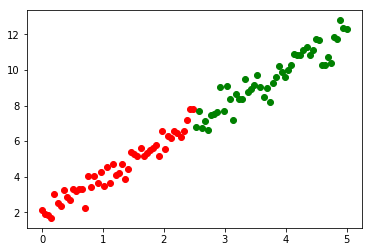

(100,)


In [73]:
plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'go')
plt.show()
print(x.shape)

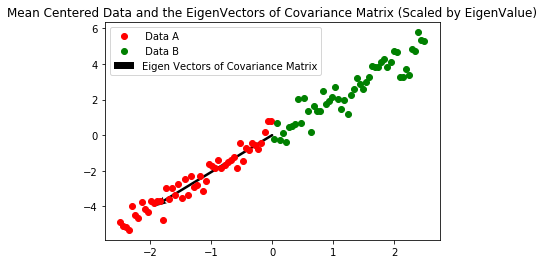

In [74]:
var = Reduced_data_set(dataset,1, True)

In [75]:
x3=var[0:50]
x4=var[50:]
y3=np.zeros(50)
y4=np.zeros(50)
print (x3.shape)

(50, 1)


(50, 1)


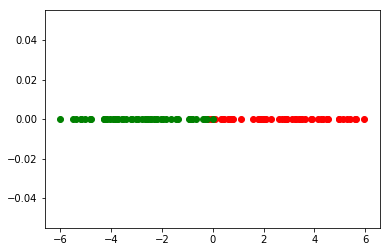

In [64]:
# fig = plt.figure(figsize=(30,10))
print (x3.shape)
plt.plot(x3,y4,'ro')
plt.plot(x4,y4,'go')
plt.show()